In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm as cm

In [2]:
data_root = '/kellogg/proj/hpk5609/Mentions/'

In [3]:
CIs = {'90': 1.645, '95': 1.96, '99': 2.576}

### Wikipedia

In [4]:
top_eth = [
 'SouthernEuropean',
 'WesternNorthernEuropean',
 'EasternEuropean',
 'EastAsian',
#  'Chinese',
 'MiddleEastern',
 'Indian',
 'African'
]


ylabels = [
 #'English',
 'Woman',
 'Southern European',
 'Western & Northern Euro.',
 'Eastern European',
 'East Asian',
#  'Chinese',
 'Middle Eastern',
 'Indian',
 'African']

cols = ["author_gender_ethneaF"] + ["author_eth_wiki_broad" + eth for eth in top_eth]

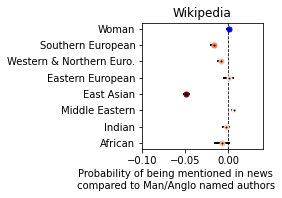

In [7]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4, 2.5))

s = 4 # markersize
lw = 1.5 # linewidth

df = pd.read_csv(data_root + 'reg_results/validation/wiki_margins.csv', header=0, index_col='factor')
df = df.loc[df.index.isin(cols)]
df = df.reindex(cols)
xs = df['AME'].values
confs = (df['upper'] - df['AME']).values

norm = matplotlib.colors.Normalize(vmin=min(xs*-1), vmax=max(xs*-1))
mapper = cm.ScalarMappable(norm=norm, cmap='Reds')
xcols = np.array([(mapper.to_rgba(v)) for v in xs*-1])

# ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], fmt='bo', markersize=s, linewidth=lw, fillstyle='full')
ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], color='k', fmt='.', markersize=2, linewidth=2)
ax.axvline(0, color='k', linestyle='--', linewidth = 0.8)

for x, ylab, coll in zip(xs, ylabels, xcols):
    if ylab == 'Woman':
        ax.plot([x], [ylab], color='b', marker='o', markersize=5)
    else:
        ax.plot([x], [ylab], color=coll, marker='o', markersize=5)
        
ax.set_xlim([-0.10, 0.04])
ax.set_title('Wikipedia')
fig.text(0.62, -0.02,'Probability of being mentioned in news\n compared to Man/Anglo named authors', ha='center', va='center')
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()
fig.savefig(data_root+'fig_one_mention_full_wiki.pdf', bbox_inches='tight', pad_inches=0.04)


### US Census 2010

In [10]:
top_eth = [
 'api',
 'black',
 'hispanic'
]


ylabels = [
 'Woman',
 'Asian',
 'Black',
 'Hispanic']

cols = ["author_gender_ethneaF"] + ["author_eth_census" + eth for eth in top_eth]

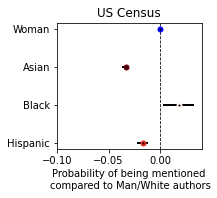

In [11]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3, 2.5))

s = 4 # markersize
lw = 1.5 # linewidth

df = pd.read_csv(data_root + 'reg_results/validation/census_margins.csv', header=0, index_col='factor')
df = df.loc[df.index.isin(cols)]
df = df.reindex(cols)
xs = df['AME'].values
confs = (df['upper'] - df['AME']).values

norm = matplotlib.colors.Normalize(vmin=min(xs*-1), vmax=max(xs*-1))
mapper = cm.ScalarMappable(norm=norm, cmap='Reds')
xcols = np.array([(mapper.to_rgba(v)) for v in xs*-1])

# ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], fmt='bo', markersize=s, linewidth=lw, fillstyle='full')
ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], color='k', fmt='.', markersize=2, linewidth=2)
ax.axvline(0, color='k', linestyle='--', linewidth = 0.8)

for x, ylab, coll in zip(xs, ylabels, xcols):
    if ylab == 'Woman':
        ax.plot([x], [ylab], color='b', marker='o', markersize=5)
    else:
        ax.plot([x], [ylab], color=coll, marker='o', markersize=5)
        
ax.set_xlim([-0.10, 0.04])
ax.set_title('US Census')
fig.text(0.62, -0.02,'Probability of being mentioned \ncompared to Man/White authors', ha='center', va='center')
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()
fig.savefig(data_root+'fig_one_mention_full_census.pdf', bbox_inches='tight', pad_inches=0.04)
